In [2]:
from manim import *
from random import seed, shuffle

Manim Community v0.17.1

## Probability via simulation

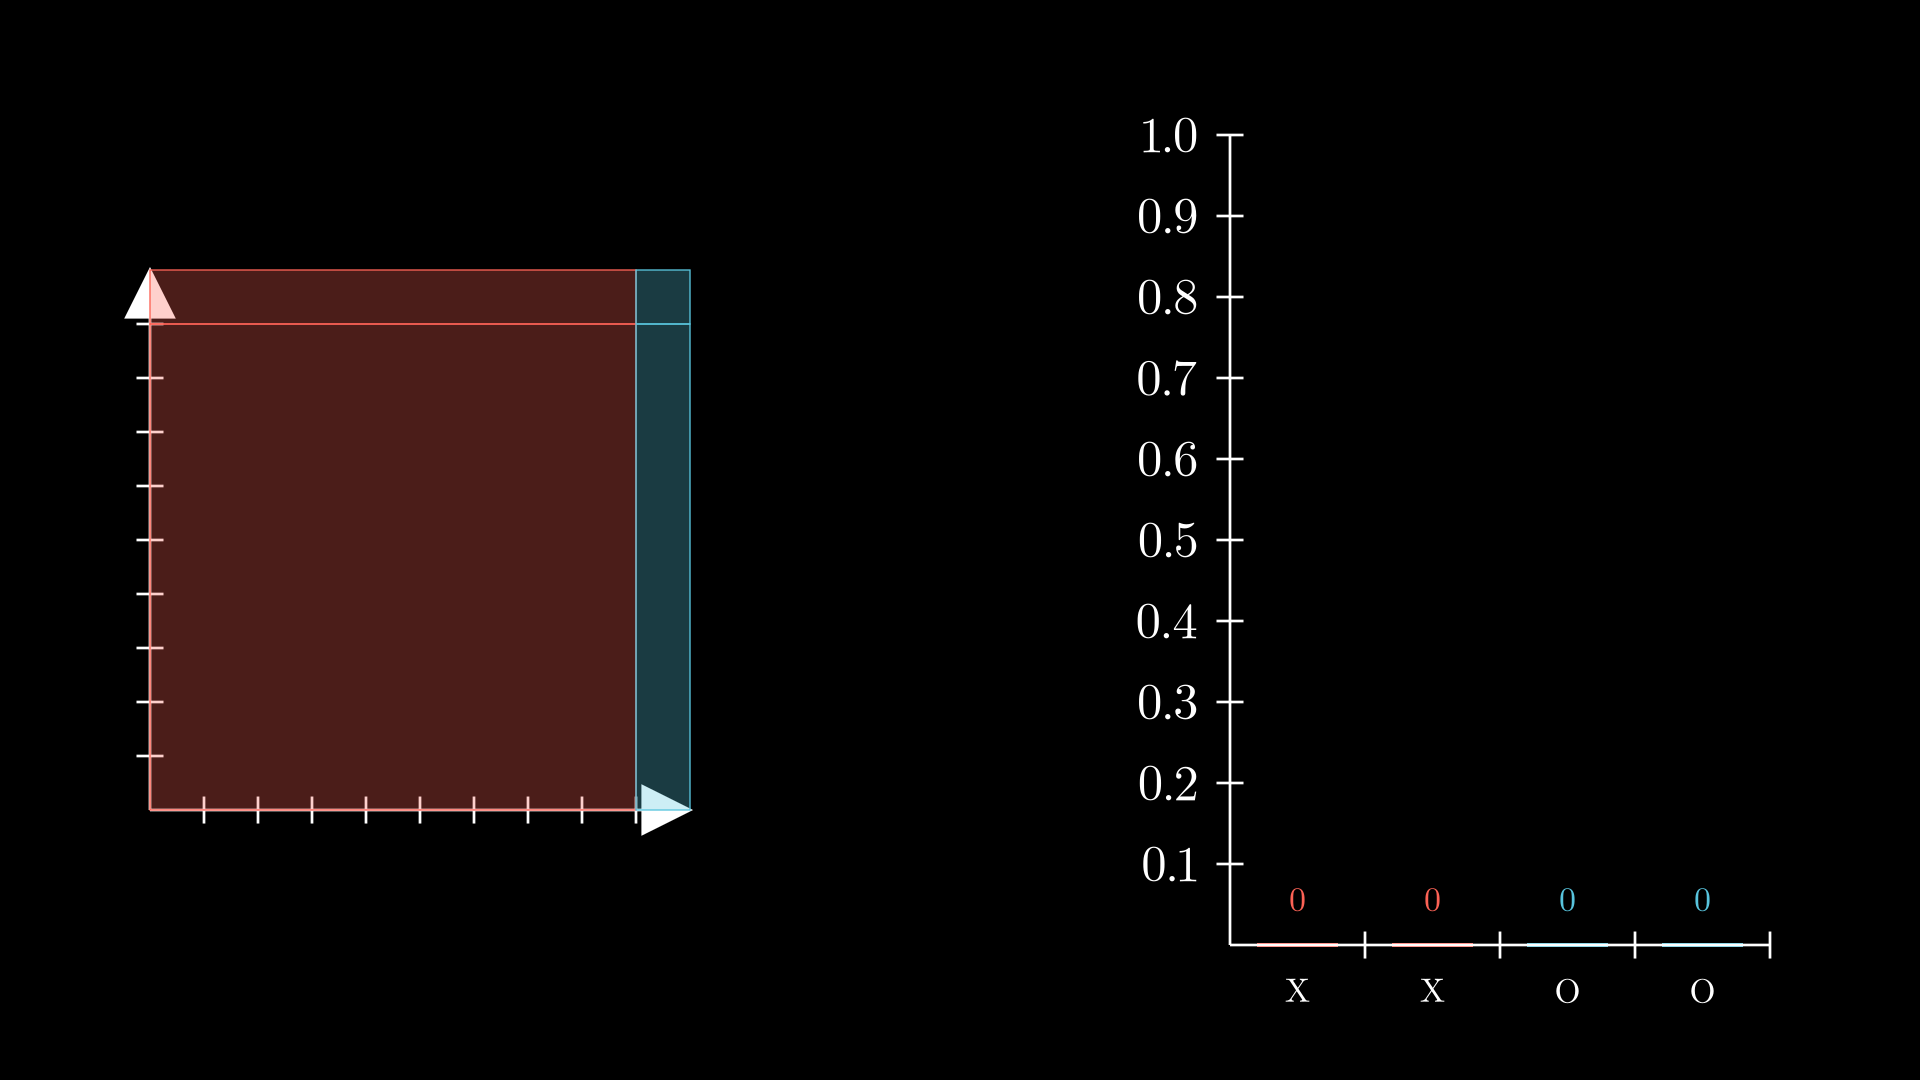

In [39]:
%%manim -v WARNING --progress_bar None ProbViaSim

seed(15)

class ProbViaSim(Scene):

    def construct(self):
        scale = 0.2
        POS_COLOR = BLUE
        NEG_COLOR = RED
        SICK_SYMB = "X"
        WELL_SYMB = "O"
        # SICK_SYMB = "☹︎"
        # WELL_SYMB = "☺︎"
        sick_icon = Text(SICK_SYMB).scale(5) # or ♓︎
        # sick_icon = Triangle()
        well_icon = Text(WELL_SYMB).scale(5)

        targetspace = Axes(
            y_range=[0, 1.0, 0.1],
            x_range=[0, 1.0, 0.1],
            y_length=4,
            x_length=4,
            # x_axis_config={"font_size": 36},
        )
        targetspace.shift(4*LEFT)
        self.add(targetspace)

        def as_rectangle_corners(bottom_left, top_right):
            return [
                (top_right[0], top_right[1]),
                (bottom_left[0], top_right[1]),
                (bottom_left[0], bottom_left[1]),
                (top_right[0], bottom_left[1]),
            ]
        
        def get_rectangle(bottom_left, top_right, color=POS_COLOR):
            polygon = Polygon(
                *[
                    targetspace.c2p(*i)
                    for i in as_rectangle_corners(
                        bottom_left, top_right
                    )
                ]
            )
            polygon.stroke_width = 1
            polygon.set_fill(color, opacity=0.3)
            polygon.set_stroke(color)
            return polygon

        well_neg_rect = get_rectangle((0.0, 0.0), (0.9, 0.9), NEG_COLOR)
        self.add(well_neg_rect)
        well_pos_rect = get_rectangle((0.9, 0.0), (1.0, 0.9), POS_COLOR)
        self.add(well_pos_rect)
        sick_neg_rect = get_rectangle((0.0, 0.9), (0.9, 1.0), NEG_COLOR)
        self.add(sick_neg_rect)
        sick_pos_rect = get_rectangle((0.9, 0.9), (1.0, 1.0), POS_COLOR)
        self.add(sick_pos_rect)

        chart = BarChart(
            values=[0,0,0,0],
            bar_names=[SICK_SYMB, SICK_SYMB, WELL_SYMB, WELL_SYMB],
            bar_colors=[NEG_COLOR, NEG_COLOR, POS_COLOR, POS_COLOR],
            y_range=[0, 1.0, 0.1],
            y_length=6,
            x_length=4,
            # x_axis_config={"font_size": 36},
        )
        chart.shift(4*RIGHT)
        c_bar_lbls = chart.get_bar_labels(font_size=24)

        self.add(chart, c_bar_lbls)